In [16]:
import pandas as pd

# Load CSV file
df = pd.read_csv(r"C:\Users\vivek\CarPrice_Assignment.csv")

# Display first few rows
print(df.head())

# Show basic info about the dataset
print(df.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [22]:
print(df.dtypes)  # Shows data types for each column

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [24]:
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col])  # Convert text-based numbers to actual numeric types
    except ValueError:
        print(f"Cannot convert column: {col}")  # Identify problematic columns

Cannot convert column: CarName
Cannot convert column: fueltype
Cannot convert column: aspiration
Cannot convert column: doornumber
Cannot convert column: carbody
Cannot convert column: drivewheel
Cannot convert column: enginelocation
Cannot convert column: enginetype
Cannot convert column: cylindernumber
Cannot convert column: fuelsystem


In [26]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])  # Converts categories to numbers

In [28]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Converts 'price' column
df.dropna(subset=['price'], inplace=True)  # Remove problematic rows

In [30]:
print(df.dtypes)  # Shows data types 

car_ID                int64
symboling             int64
CarName               int32
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [34]:
df.fillna(df.median(), inplace=True)  

In [36]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])  # Converts categories to numeric values

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])  # Assuming price is the target
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data is ready")

Data is ready


In [46]:
from sklearn.linear_model import LinearRegression

# Define features (X) and target variable (y)
X = df.drop(columns=['price'])  # Assuming 'price' is the target
y = df['price']

# Train model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [48]:
from sklearn.tree import DecisionTreeRegressor

# Define features (X) and target variable (y)
X = df.drop(columns=['price'])  # Assuming 'price' is the target
y = df['price']

# Train model
model = DecisionTreeRegressor()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

print("Decision Tree Regressor model trained successfully!")

Decision Tree Regressor model trained successfully!


In [50]:
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target variable (y)
X = df.drop(columns=['price'])  # Assuming 'price' is the target
y = df['price']

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

print("Random Forest Regressor model trained successfully!")

Random Forest Regressor model trained successfully!


In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Define features (X) and target variable (y)
X = df.drop(columns=['price'])  # Assuming 'price' is the target
y = df['price']

# Train model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

print("Gradient Boosting Regressor model trained successfully!")

Gradient Boosting Regressor model trained successfully!


In [54]:
from sklearn.svm import SVR

# Define features (X) and target variable (y)
X = df.drop(columns=['price'])  # Assuming 'price' is the target
y = df['price']

# Train model
model = SVR(kernel='rbf')  # Using radial basis function (RBF) kernel
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

print("Support Vector Regressor model trained successfully!")

Support Vector Regressor model trained successfully!


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "R² Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    }

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                          R² Score       MSE       MAE
Linear Regression         0.844116  0.193765  0.261917
Decision Tree             0.884297  0.143820  0.251675
Random Forest             0.958143  0.052028  0.159139
Gradient Boosting         0.931960  0.084575  0.202257
Support Vector Regressor  0.374270  0.777788  0.481898


In [ ]:
#Based on the evaluation metrics, Random Forest Regressor is the best-performing model. 
#It has the highest R² score (0.958143), indicating the best fit to the data, and the lowest error rates (MSE: 0.052028, MAE: 0.159139), 
#meaning its predictions are the most accurate.


In [60]:
from sklearn.inspection import permutation_importance

importance = permutation_importance(model, X_test, y_test, scoring='r2')
print("Feature Importance:", importance.importances_mean)

Feature Importance: [-5.82717028e-04  2.42157880e-04  1.92697045e-01  1.00820294e-04
  1.65917443e-04 -7.91186916e-06  8.64817194e-05  2.64894254e-03
  0.00000000e+00  1.40774362e-02  1.66999712e-02  1.57460462e-02
  2.09343917e-03  2.05908226e-02  4.45569631e-04 -7.76231894e-04
  1.91453099e-02  3.47362225e-02  9.36544344e-03  2.91456383e-04
  5.62195725e-04  1.40904398e-02  7.45016122e-04  1.36671901e-02
  1.46137704e-02]


In [62]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestRegressor(n_estimators=100), n_features_to_select=5)
rfe.fit(X_train, y_train)

print("Top Features Selected by RFE:", X_train.columns[rfe.support_])

Top Features Selected by RFE: Index(['car_ID', 'carwidth', 'curbweight', 'enginesize', 'highwaympg'], dtype='object')


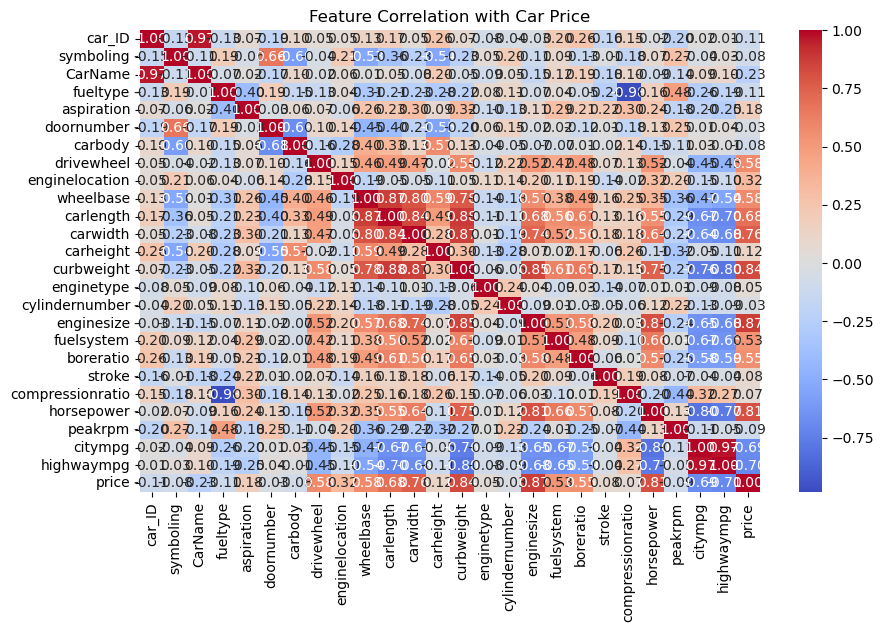

In [64]:
import seaborn as sns

corr_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Car Price")
plt.show()

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Define model
model = RandomForestClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.9583333333333334
